# Import Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import the data

In [2]:
df = pd.read_csv('C:\\Users\\mnjaa\OneDrive\Desktop\\heart_decision.csv')
df.head(10)

,sex,chol,restecg,target
0,1,233,0,1
1,1,250,1,1
2,0,204,0,1
3,1,236,1,1
4,0,354,1,1
5,1,192,1,1
6,0,294,0,1
7,1,263,1,1
8,1,199,1,1
9,1,168,1,1


# Countplot

[Text(0.5, 1.0, 'Heart Disease vs No Disease')]

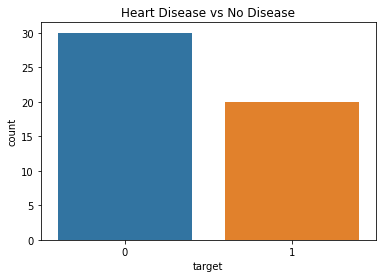

In [3]:
ax = sns.countplot(x='target',data=df)
ax.set(title="Heart Disease vs No Disease")
plt.show()

# Histograms for the Features

(array([ 5.,  5.,  4., 12.,  6.,  6.,  6.,  1.,  2.,  3.]),
 array([167. , 185.7, 204.4, 223.1, 241.8, 260.5, 279.2, 297.9, 316.6,
        335.3, 354. ]),
 <a list of 10 Patch objects>)

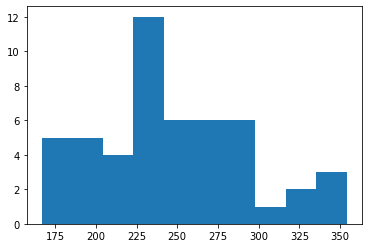

In [4]:
plt.hist(df.chol)
plt.show()

(array([13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 37.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

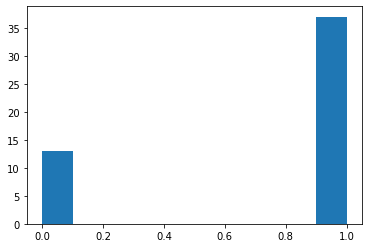

In [5]:
plt.hist(df.sex)
plt.show()

(array([27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

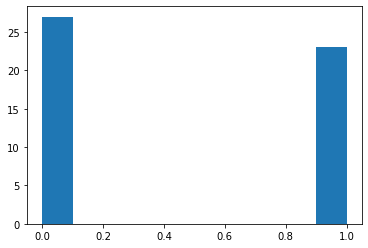

In [6]:
plt.hist(df.restecg)
plt.show()

# Identify Features & the target

In [7]:
features = df[['sex','chol','restecg']]
target = df.target
features.corr()

,sex,chol,restecg
sex,1.000000,-0.346016,-0.093315
chol,-0.346016,1.000000,0.142075
restecg,-0.093315,0.142075,1.000000


# Scaling the features

In [8]:
# Scale: replaces the values by their Z scores.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaledfeatures = sc.fit_transform(features) # scale our features

# Defining the test set

In [9]:
#defining the test set
from sklearn.model_selection import train_test_split

features_train, features_test,target_train,target_test = train_test_split(scaledfeatures,target)

# Classification

In [10]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(features_train,target_train)

DecisionTreeClassifier(random_state=0)

# Model prediction

In [11]:
# predict with your model
predictions = model.predict(features_test)
predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

# Confusion Matrix

In [12]:
# confusion matrix
predictions = model.predict(features_test)
predictions.shape

pd.crosstab(target_test, predictions,rownames = ['Actual'],colnames = ['Predicted'])

(13,)

Predicted,0,1
Actual,,
0,2,3
1,3,5


# Classification report

In [13]:
from sklearn.metrics import classification_report
# Test Accuracy
print('\n ****** Classification Report *** \n\n')
print(classification_report(target_test, predictions))


 ****** Classification Report *** 


              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.62      0.62      0.62         8

    accuracy                           0.54        13
   macro avg       0.51      0.51      0.51        13
weighted avg       0.54      0.54      0.54        13



# Decision Tree

In [14]:
# plot tree
from IPython.display import Image  
from sklearn import tree
import pydotplus  

# conda install pydotplus

# Create DOT data
dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded=True,
                                feature_names=features.columns,  
                                class_names='target')



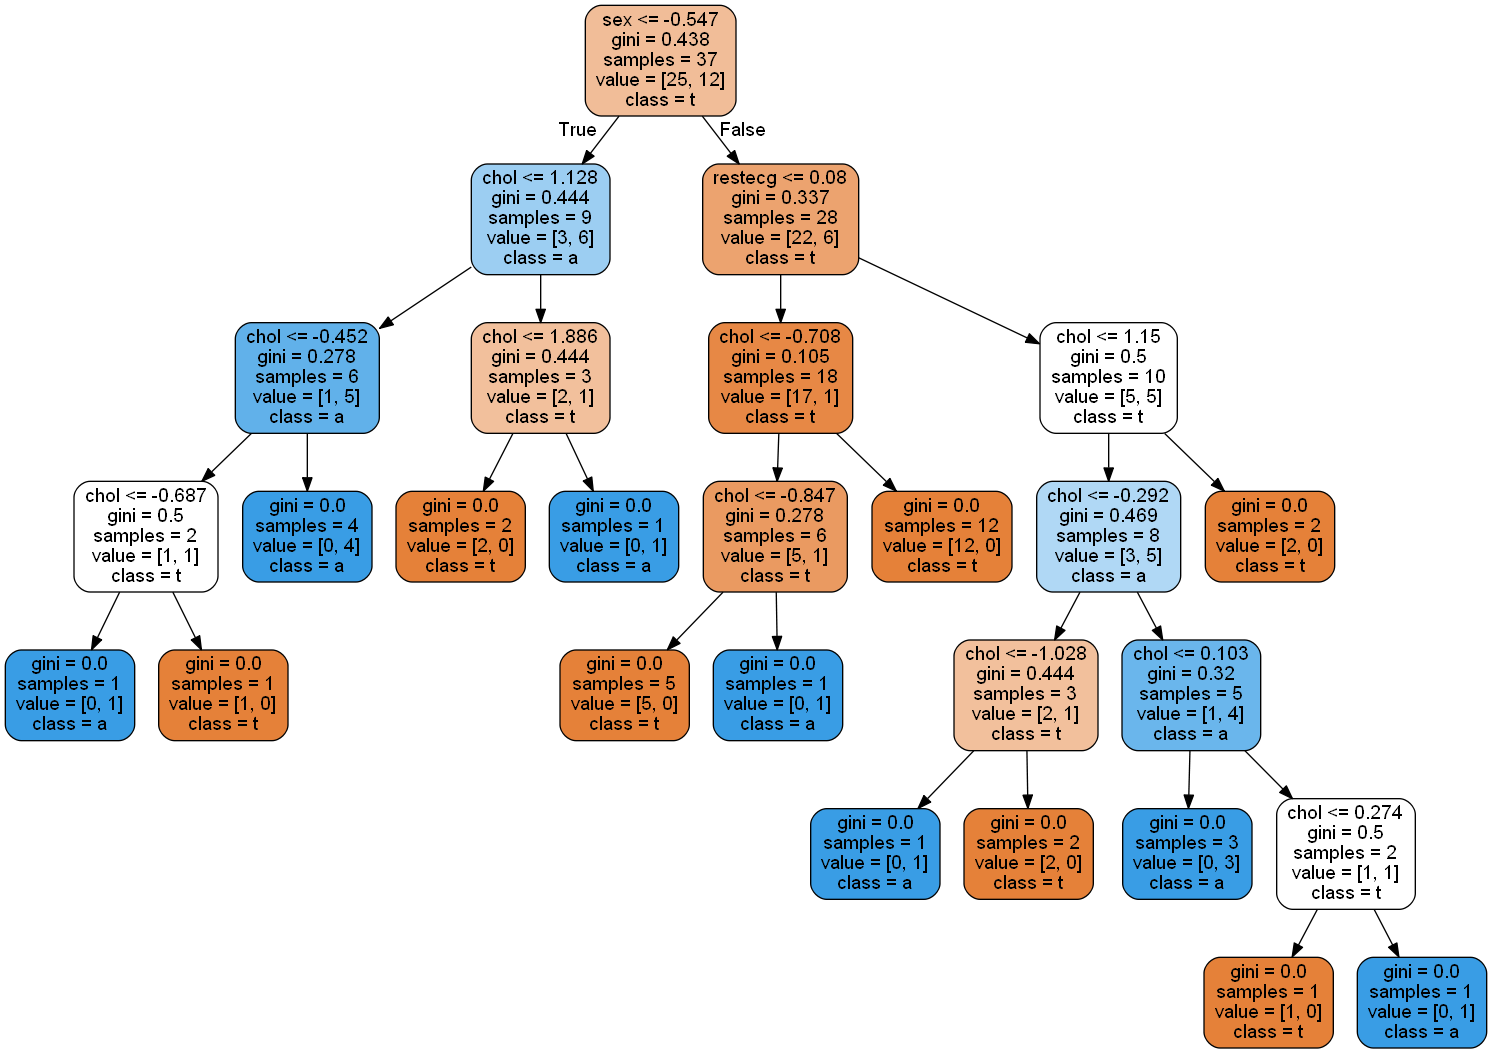

In [15]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())